<a href="https://colab.research.google.com/github/WhitneyMadafali/Water-Requirement-Prediction-for-Maize-using-KNN/blob/knn/knntrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns # for data visualiztions

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving xdata.csv to xdata.csv


In [ ]:
df = pd.read_csv('xdata.csv')
df.head()

,SoilMoisture,temperature,Humidity,Irrigation
0,580,23,56,1
1,189,24,50,0
2,345,21,55,0
3,653,20,54,1
4,198,21,52,0


In [ ]:
df.shape


(1002, 4)

In [ ]:
# find the data types of the attributes
df.dtypes

SoilMoisture    int64
temperature     int64
Humidity        int64
Irrigation      int64
dtype: object

In [ ]:
# concise summary of the data
df.describe()

,SoilMoisture,temperature,Humidity,Irrigation
count,1002.000000,1002.000000,1002.000000,1002.000000
mean,411.391218,24.682635,39.381238,0.393214
std,199.000115,12.105475,22.606930,0.488707
min,120.000000,14.000000,11.000000,0.000000
25%,230.000000,20.000000,19.000000,0.000000
50%,369.000000,24.000000,32.000000,0.000000
75%,554.000000,28.000000,65.000000,1.000000
max,990.000000,263.000000,85.000000,1.000000


In [ ]:
# find if missing values is present
df.isnull().sum()

SoilMoisture    0
temperature     0
Humidity        0
Irrigation      0
dtype: int64

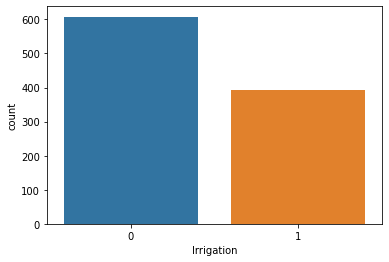

In [ ]:
# get the distribution of the target variable
sns.countplot(x="Irrigation", data = df)

In [ ]:
# Separate the dependent and independent features
X = df[['SoilMoisture','temperature','Humidity']]
y = df['Irrigation']

In [ ]:
# Standardize the data and then concatenate it with y
data = X
data_std = (data - data.mean())/(data.max() - data.min())
data = pd.concat([data_std,y], axis=1)

In [ ]:
# reshape the dataframe using melt()
data = pd.melt(data, id_vars = 'Irrigation', var_name = 'features',value_name = 'value')
data


,Irrigation,features,value
0,1,SoilMoisture,0.193803
1,0,SoilMoisture,-0.255622
2,0,SoilMoisture,-0.076312
3,1,SoilMoisture,0.277711
4,0,SoilMoisture,-0.245277
...,...,...,...
3001,1,Humidity,-0.275422
3002,0,Humidity,-0.302449
3003,0,Humidity,-0.288936
3004,1,Humidity,-0.288936


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 73.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 95.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 76.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


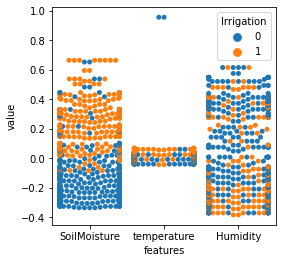

In [ ]:
# swarmplot for analysing the different attributes
plt.figure(figsize = (4,4))
sns.swarmplot(x = 'features', y = 'value', hue = 'Irrigation', data = data)
plt.show()

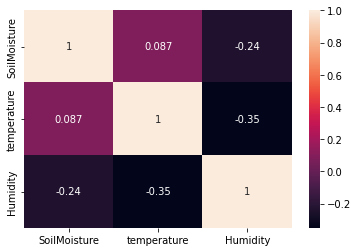

In [ ]:
# obtain a correlation heatmap
sns.heatmap(X.corr(), annot=True)

# **Feature Selection**

In [ ]:
# split the dataset into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
print('Training set shape: ', X_train.shape, y_train.shape)
print('Testing set shape: ', X_test.shape, y_test.shape)

Training set shape:  (751, 3) (751,)
Testing set shape:  (251, 3) (251,)


In [ ]:
from sklearn.feature_selection import chi2, SelectKBest, f_classif

In [ ]:
# Get the two best(k = 2) features using the SelectKBest method
ft = SelectKBest(chi2, k = 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [31994.02638827    57.07461838   341.55135143]
Columns:  Index(['SoilMoisture', 'temperature', 'Humidity'], dtype='object')


In [ ]:
ft = SelectKBest(f_classif, k= 2).fit(X_train, y_train)
print('Score: ', ft.scores_)
print('Columns: ', X_train.columns)

Score:  [620.50460541  13.11807113  27.1043798 ]
Columns:  Index(['SoilMoisture', 'temperature', 'Humidity'], dtype='object')


In [ ]:
X_train_2 = ft.transform(X_train)
X_test_2 = ft.transform(X_test)

In [ ]:
from sklearn import preprocessing
X_train = preprocessing.StandardScaler().fit(X_train_2).transform(X_train_2.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test_2).transform(X_test_2.astype(float))

# **k-Nearest Neighbors**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn

KNeighborsClassifier()

In [ ]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

KNeighborsClassifier()

In [ ]:
from sklearn import metrics

In [ ]:
# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat= knn.predict(X_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.83266932, 0.8247012 , 0.812749  , 0.812749  , 0.86454183,
       0.86055777, 0.86454183, 0.85657371, 0.87250996, 0.87649402,
       0.87250996, 0.88047809, 0.88047809, 0.87649402, 0.86055777,
       0.8685259 , 0.85258964, 0.85657371, 0.84462151, 0.86055777])

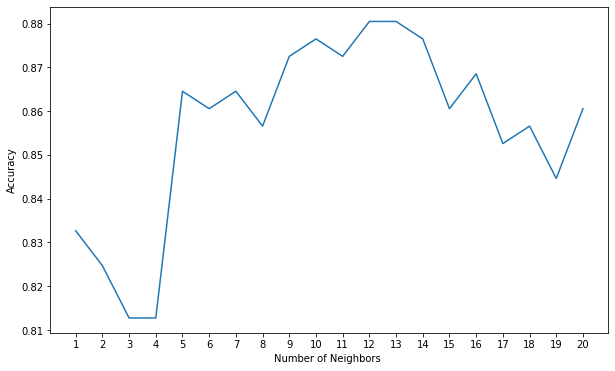

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors ')
plt.ylabel('Accuracy')
plt.show()

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_params = { 'n_neighbors' : [10,11,12,13,14,16],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

In [ ]:
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

In [ ]:
# fit the model on our train set
g_res = gs.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


In [ ]:
# find the best score
g_res.best_score_

0.9214555112881806

In [ ]:
# get the hyperparameters with the best score
g_res.best_params_

{'metric': 'minkowski', 'n_neighbors': 16, 'weights': 'distance'}

In [ ]:
# use the best hyperparameters
knn = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform',algorithm = 'brute',metric = 'minkowski')
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [ ]:
# get a prediction
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

# **Model Evaluation**

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  0.9094540612516645
Test set accuracy:  0.8645418326693227


In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_knn))

[[138  19]
 [ 15  79]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       157
           1       0.81      0.84      0.82        94

    accuracy                           0.86       251
   macro avg       0.85      0.86      0.86       251
weighted avg       0.87      0.86      0.87       251



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv =5)

In [ ]:
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.8523084577114428


In [ ]:
# Import pickle Package

import pickle

In [ ]:
# Save the Modle to file in the current working directory

Pkl_Filename = "Pickle_RL_Model.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(knn, file)

In [ ]:
# Load the Model back from file
with open(Pkl_Filename, 'rb') as file:  
    Pickledknn = pickle.load(file)

Pickledknn

KNeighborsClassifier(algorithm='brute')

In [ ]:
# Use the Reloaded Model to 
# Calculate the accuracy score and predict target values

# Calculate the Score 
score = Pickledknn.score(X_test, y_test)  
# Print the Score
print("Test score: {0:.2f} %".format(100 * score))  

# Predict the Labels using the reloaded Model
Ypredict = Pickledknn.predict(X_test)  

Ypredict

Test score: 86.45 %


array([0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1])